# 每週發文數量

/var/folders/32/17fwcjcd1kv9vkdd_3w2k4vw0000gn/T/ipykernel_6335/2358973741.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


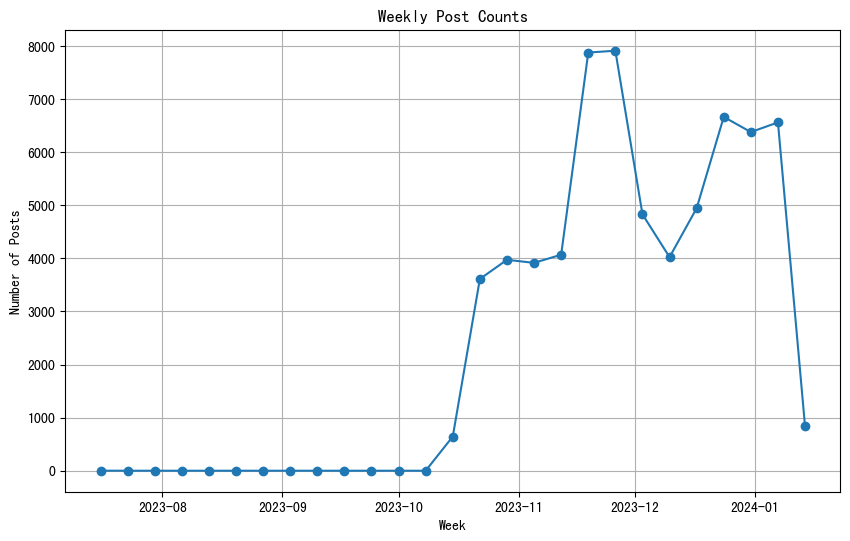

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設 CSV 檔案有一個名為 'date' 的日期欄位
# 將 'your_data.csv' 替換為您的 CSV 檔案路徑
file_path = 'raw.csv'
data = pd.read_csv(file_path)

# 將 'date' 欄位轉換為 datetime 格式
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# 按週分組並計算每週的發文數量
weekly_post_count = data.resample('W', on='date').size()

# 繪製數據
plt.figure(figsize=(10, 6))
plt.plot(weekly_post_count.index, weekly_post_count, marker='o')
plt.title('Weekly Post Counts')
plt.xlabel('Week')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()


# each author push,boo數量

In [3]:
import pandas as pd

# 讀取數據
file_path = 'message_count.csv' 
message_count_data = pd.read_csv(file_path)

# 將消息計數列轉換為數字類型
numeric_cols = ['message_count_all', 'message_count_boo', 'message_count_count', 'message_count_neutral', 'message_count_push']
message_count_data[numeric_cols] = message_count_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 按 'author' 匯總數據
aggregated_data = message_count_data.groupby('author')[numeric_cols].sum().reset_index()

# 顯示匯總後的數據前幾行
aggregated_data.head()


author  message_count_all  message_count_boo  \
0                   A1an (再說)               26.0                1.0   
1  A1bertPujols (The Machine)              394.0               19.0   
2                   A330 (大鳥)               12.0                4.0   
3                    A4013 ()               92.0                4.0   
4                     AAAB ()               58.0                8.0   

   message_count_count  message_count_neutral  message_count_push  
0                  7.0                   17.0                 8.0  
1                104.0                  252.0               123.0  
2                 -1.0                    5.0                 3.0  
3                 18.0                   66.0                22.0  
4                 12.0                   30.0                20.0

In [4]:
# Sorting the data by 'message_count_push' in descending order and getting the top 10 authors
top_10_push = aggregated_data.sort_values(by='message_count_push', ascending=False).head(10)
top_10_push

author  message_count_all  message_count_boo  \
414               LeeSeDol (嘖嘖...)            36940.0             4598.0   
2283          kcbill (明日やろうは馬鹿野郎だ)            32982.0             3157.0   
2678           miler22020 (柯糞網軍頭子)            34366.0             3133.0   
2881             oscarwu3041 (小羽毛)            28477.0             3124.0   
2777           nicholas0406 (尼可拉斯)            28233.0             2789.0   
735   TheoEpstein (Red Sox→Cubs→？)            35485.0             1913.0   
2094         jacklyl (全力殲滅糞兔兔卡娜赫拉)            24777.0             2427.0   
3796               xamous (一天死去一點)            22754.0             2814.0   
2528           lolahjy (我是貓,名字還沒有)            19975.0             1634.0   
294                Homura (德意志國防貓)            19686.0             1582.0   

      message_count_count  message_count_neutral  message_count_push  
414                8083.0                19661.0             12681.0  
2283               9403.0                17265.0             12560.0  
2678               9411.0                18689.0             12544.0  
2881               7678.0                14551.0             10802.0  
2777               7282.0                15373.0             10071.0  
735                7681.0                23978.0              9594.0  
2094               5853.0                14070.0              8280.0  
3796               5097.0                12029.0              7911.0  
2528               6220.0                10487.0              7854.0  
294                6176.0                10346.0              7758.0

# each author 發文數量

In [5]:
# Calculating the number of posts for each author
posts_count_per_author = message_count_data.groupby('author').size().reset_index(name='posts_count')

# Sorting the data by the number of posts in descending order
sorted_posts_count_per_author = posts_count_per_author.sort_values(by='posts_count', ascending=False)

sorted_posts_count_per_author.head(10)  # Displaying the top few rows



author  posts_count
3923        zeuswell (幫我想個有梗的暱稱)          732
617     Rrrxddd (有噴 nlnlOeO RR )          449
2094       jacklyl (全力殲滅糞兔兔卡娜赫拉)          361
414             LeeSeDol (嘖嘖...)          345
2457             leon771170 (許肥)          335
2881           oscarwu3041 (小羽毛)          325
1347                   chu (chu)          311
2678         miler22020 (柯糞網軍頭子)          307
2283        kcbill (明日やろうは馬鹿野郎だ)          298
700   Supasizeit (Shitpost King)          298

# 社群網路分析圖：用戶之間的關聯（無向圖，只要有推或噓就算有互動）

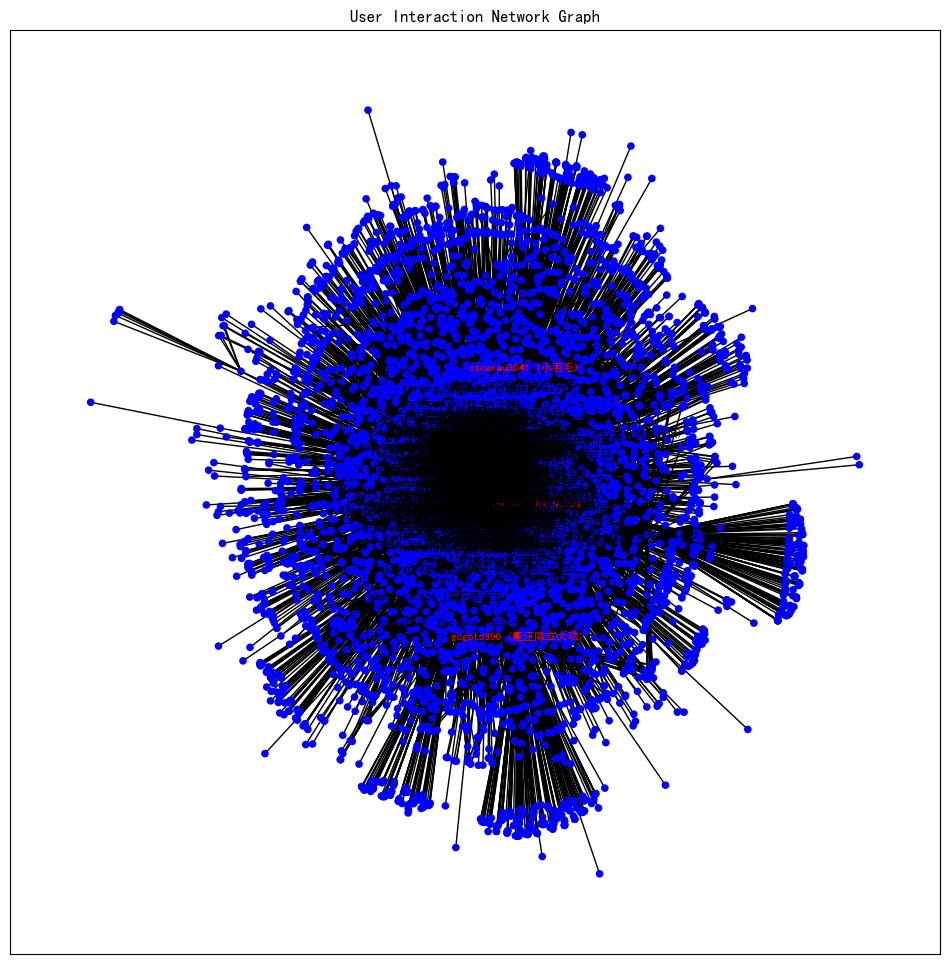

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 讀取數據
file_path = 'messages_week_42.csv'  
data = pd.read_csv(file_path)


# 創建一個網絡圖對象
G = nx.Graph()

# 根據互動添加邊
for index, row in data.iterrows():
    G.add_edge(row['author'], row['push_userid'])

# 計算所有節點的度
degrees = dict(G.degree())

# 找出度最高的三個節點
top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:3]

# 設定節點名稱顯示的閾值
threshold = 20

# 為節點設置不同的顏色
node_colors = ['red' if node in top_nodes else 'blue' for node in G.nodes()]

# 篩選出連結數大於等於閾值的節點或前三名節點，其餘節點標籤不顯示
labels = {node: node if (node in top_nodes or G.degree(node) >= threshold) else '' for node in G.nodes()}
label_colors = {node: 'red' if node in top_nodes else 'black' for node in labels if labels[node] != ''}

# 繪製網絡圖
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=20)
nx.draw_networkx_edges(G, pos)

# 單獨繪製每個節點的標籤以設置顏色
for node, label_color in label_colors.items():
    nx.draw_networkx_labels(G, pos, labels={node: node}, font_color=label_color, font_size=8)

plt.title("User Interaction Network Graph")
plt.show()


# 上圖因數量太龐大(一週資料量)，無法清楚的呈現結果

# 社群網路分析圖：改成節點之間互動次數大於300

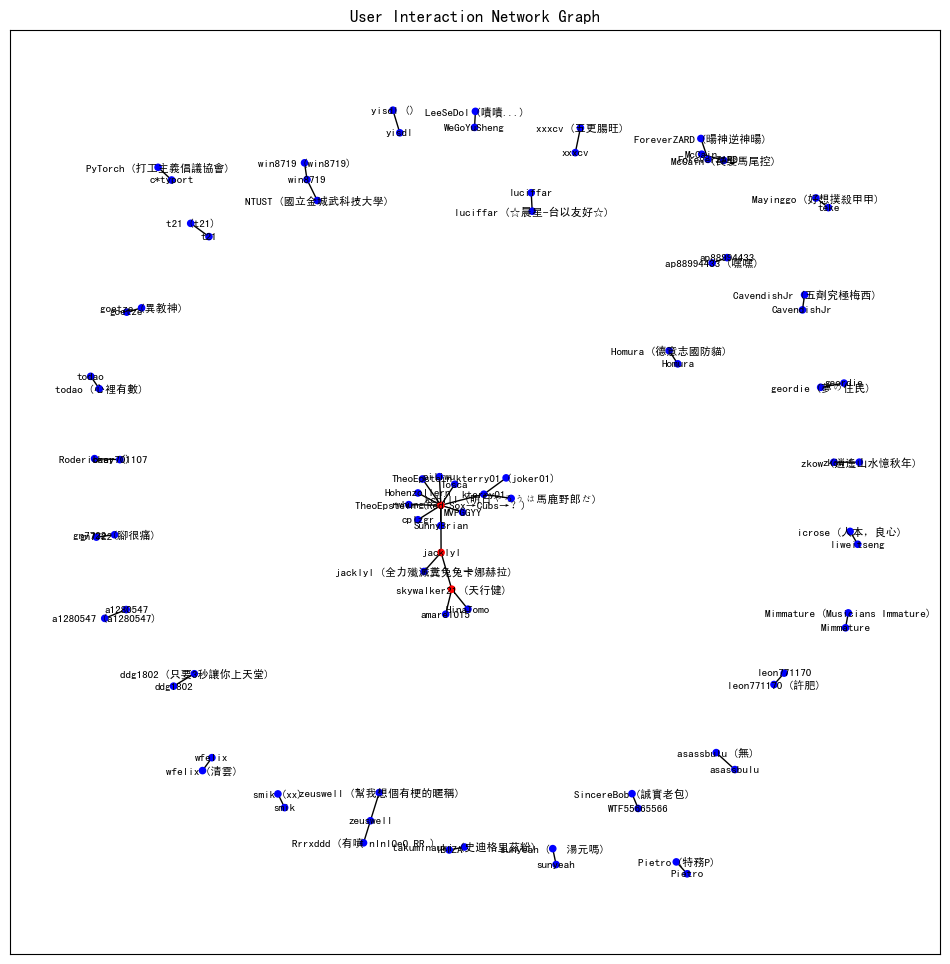

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

# 設定中文字型
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 讀取數據：3個月資料量
file_path = 'message_0108.csv'  
data = pd.read_csv(file_path)

# 創建一個網絡圖對象
G = nx.Graph()

# 根據互動添加邊，並計數每對節點間的互動次數
interaction_counts = {}
for index, row in data.iterrows():
    edge = (row['author'], row['push_userid'])
    if edge in interaction_counts:
        interaction_counts[edge] += 1
    else:
        interaction_counts[edge] = 1

# 只有當互動次數大於300的邊才會被添加到圖中
for edge, count in interaction_counts.items():
    if count > 300:
        G.add_edge(*edge)

# 計算所有節點的度
degrees = dict(G.degree())

# 找出度最高的三個節點
top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:3]

# 為節點設置不同的顏色
node_colors = ['red' if node in top_nodes else 'blue' for node in G.nodes()]

# 為所有節點分配標籤
labels = {node: node for node in G.nodes()}

# 繪製網絡圖
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=20)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels=labels, font_color='black', font_size=8)

plt.title("User Interaction Network Graph")
plt.show()


In [8]:


# 設定互動次數的閾值
interaction_threshold = 300

# 創建一個列表來存儲互動次數超過閾值的節點對及其互動次數
filtered_interactions = []

# 遍歷互動計數，只考慮互動次數超過閾值的邊
for edge, count in interaction_counts.items():
    if count > interaction_threshold:
        filtered_interactions.append((edge, count))

# 按互動次數從大到小排序
filtered_interactions.sort(key=lambda x: x[1], reverse=True)

# 打印被篩選出來的節點及其互動次數（從大到小）
print("被篩選出來的節點及其互動次數（超過300次，從大到小）:")
for edge, count in filtered_interactions:
    print(f"節點 {edge[0]} 和 {edge[1]} 的互動次數: {count}")


被篩選出來的節點及其互動次數（超過300次，從大到小）:
節點 TheoEpstein (Red Sox→Cubs→？) 和 TheoEpstein 的互動次數: 2971
節點 win8719 (win8719) 和 win8719 的互動次數: 2542
節點 todao (心裡有數) 和 todao 的互動次數: 980
節點 zeuswell (幫我想個有梗的暱稱) 和 zeuswell 的互動次數: 958
節點 zkow (逍遙山水憶秋年) 和 zkow 的互動次數: 712
節點 TheoEpstein (Red Sox→Cubs→？) 和 Hohenzollern 的互動次數: 699
節點 McCain (長髮馬尾控) 和 McCain 的互動次數: 655
節點 geordie (夢の住民) 和 geordie 的互動次數: 643
節點 skywalker21 (天行健) 和 jacklyl 的互動次數: 593
節點 CavendishJr (五劑究極梅西) 和 CavendishJr 的互動次數: 587
節點 Homura (德意志國防貓) 和 Homura 的互動次數: 547
節點 a1280547 (a1280547) 和 a1280547 的互動次數: 528
節點 PyTorch (打工主義倡議協會) 和 c*typort 的互動次數: 528
節點 leon771170 (許肥) 和 leon771170 的互動次數: 513
節點 skywalker21 (天行健) 和 amare1015 的互動次數: 501
節點 Mayinggo (好想撲殺甲甲) 和 teke 的互動次數: 498
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 jacklyl 的互動次數: 496
節點 goetze (異教神) 和 goetze 的互動次數: 487
節點 Pietro (特務P) 和 Pietro 的互動次數: 476
節點 sunyeah (   湯元嗎) 和 sunyeah 的互動次數: 474
節點 TheoEpstein (Red Sox→Cubs→？) 和 MVPGGYY 的互動次數: 472
節點 Mimmature (Musicians Immature) 和 Mimmature 的互動次數: 448
節點 i

# 找出度最高的三個節點及其度數

In [9]:
top_three_nodes = sorted(degrees.items(), key=lambda item: item[1], reverse=True)[:3]

# 打印前三名節點的名稱及其度數
print("前三名節點及其度數：")
for node, degree in top_three_nodes:
    print(f"節點名稱: {node}, 度數: {degree}")

前三名節點及其度數：
節點名稱: TheoEpstein (Red Sox→Cubs→？), 度數: 10
節點名稱: skywalker21 (天行健), 度數: 3
節點名稱: jacklyl, 度數: 3


# 以度數最多的角度出發

# 查看TheoEpstein (Red Sox→Cubs→？)都跟誰互動

In [10]:
import pandas as pd
import networkx as nx

# 讀取數據
file_path = 'message_0108.csv'  
data = pd.read_csv(file_path)

# 指定感興趣的節點
specific_node = 'TheoEpstein (Red Sox→Cubs→？)'  # 請替換為實際節點名稱

# 創建一個網絡圖對象
G = nx.Graph()

# 根據互動添加邊，並計數每對節點間的互動次數
interaction_counts = {}
for index, row in data.iterrows():
    edge = (row['author'], row['push_userid'])
    if edge in interaction_counts:
        interaction_counts[edge] += 1
    else:
        interaction_counts[edge] = 1

# 設定互動次數的閾值
interaction_threshold = 300

# 創建一個列表來存儲特定節點的互動次數超過閾值的節點對及其互動次數
filtered_interactions = []

# 遍歷互動計數，只考慮涉及特定節點且互動次數超過閾值的邊
for edge, count in interaction_counts.items():
    if specific_node in edge and count > interaction_threshold:
        filtered_interactions.append((edge, count))

# 按互動次數從大到小排序
filtered_interactions.sort(key=lambda x: x[1], reverse=True)

# 打印被篩選出來的節點及其互動次數（從大到小）
print(f"與節點 {specific_node} 的互動次數（超過300次，從大到小）:")
for edge, count in filtered_interactions:
    print(f"節點 {edge[0]} 和 {edge[1]} 的互動次數: {count}")


與節點 TheoEpstein (Red Sox→Cubs→？) 的互動次數（超過300次，從大到小）:
節點 TheoEpstein (Red Sox→Cubs→？) 和 TheoEpstein 的互動次數: 2971
節點 TheoEpstein (Red Sox→Cubs→？) 和 Hohenzollern 的互動次數: 699
節點 TheoEpstein (Red Sox→Cubs→？) 和 MVPGGYY 的互動次數: 472
節點 TheoEpstein (Red Sox→Cubs→？) 和 rwhung 的互動次數: 412
節點 TheoEpstein (Red Sox→Cubs→？) 和 kterry01 的互動次數: 379
節點 TheoEpstein (Red Sox→Cubs→？) 和 piliwu 的互動次數: 375
節點 TheoEpstein (Red Sox→Cubs→？) 和 Tosca 的互動次數: 350
節點 TheoEpstein (Red Sox→Cubs→？) 和 SunnyBrian 的互動次數: 325
節點 TheoEpstein (Red Sox→Cubs→？) 和 cplzgr 的互動次數: 320
節點 TheoEpstein (Red Sox→Cubs→？) 和 jacklyl 的互動次數: 303


# 查看TheoEpstein (Red Sox→Cubs→？)都發什麼文

In [12]:
import pandas as pd

# 讀取數據
file_path = 'message_0108.csv'  
data = pd.read_csv(file_path)

# 指定感興趣的作者名字
specific_author = 'TheoEpstein (Red Sox→Cubs→？)'  # 請替換為實際作者名稱

# 篩選出該作者的發文內容，去除重複內容
author_content = data[data['author'] == specific_author]['content'].unique()

count = 0
# 顯示該作者的發文內容
for content in author_content:
    count +=1
    print(content)
    print("----")


是這樣的啦，明年113投票不是只投總統選票耶。 還有不分區政黨票跟區域立委票。 民眾黨區域立委提名作業也已經完成，發言人說了不會再多提名了 。 台北市 文山、南中正 提名張其祿 新北市 三重蘆洲五股 提名李有宜 新北市 中和 提名邱臣遠 桃園市 平鎮、龍潭 提名賴香伶 桃園市 八德大溪復興 提名李慕妍 台中市 大甲大安清水 提名蔡壁如 高雄市 美濃旗山六龜 提名曾尹儷 宜蘭縣 提名陳婉惠 金門縣 提名尚文凱 連江縣 提名曹爾凱 不看政黨提名的話還有支持這些： 新竹市 柯文哲胞妹柯美蘭 台北市 中正萬華 于美人 白粉有關心自己住的地方的區域立委嗎？明年可以投他們一票喔。 PS. 我 柯粉 ，還幫忙整理清單提醒大家投票，夠柯粉吧。 嫌我是假柯粉的那些白粉，你們關心過立委投票嗎？或甚至你們知道有立委可以投嗎？ 目前看起來不會。 不知道為什麼，白粉都不關心白黨立委提名？ 那區撞四連霸立委國民黨呂玉玲。 這些也是要花保證金下去選的，多少支持一下至少幫他們拿回保證金吧？ 我無法想像呂玉玲落選的樣子。 去年市長選舉，勞母在這邊拿4趴。 5%的結果會被沒收保證金。 以投票率66%算的話大概要15%的得票才能拿回選舉保證金。
----
有圖有真相： http://i.imgur.com/XMrh1zd.jpg 前幾天味全龍請三上悠亞去開球。 結果在日本引起軒然大波。 日本人痛罵怎麼可以在有小孩的地方讓三上悠亞這種人公開出現還開球。 還有人痛罵這種事 就像餐廳有會造成過敏的食材 卻不告知一樣。 目前網路上已經炎上起來了，燒到三上本人都出來低調表示自己只是接工作而已。 很多日本人氣憤的態度可能會引發對中華職棒的近一步言語攻擊甚至抵制。 畢竟日本人已經 把台灣職棒當成會教壞小孩子的範例 了。 政黑點： 賴清德本身也是棒球迷，對於台日關係受到影響不知道有什麼想法。 
----
明年選戰的主戰場是立法院，這件事很重要。 : 最新調查結果顯示，不分區立委支持度中，國民黨以25%為最高， : 民進黨23%、民眾黨20%。 基本上，要過5%才有不分區席次。 所以明年大概就是這三個政黨有席次而已，其他小黨要拚3%的政黨補助款。 如果最後比例是這樣的話。 不分區的34席會很歡樂。 國民黨：36.76% 民進黨：33.82% 民眾黨：29.41% 換算後得到： 民眾黨10席不分區。 民進黨11席不分區。 

In [13]:
print(f"發文數量：{count}")

發文數量：208


# 進行文字分析，使用jieba跟文字雲

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/32/17fwcjcd1kv9vkdd_3w2k4vw0000gn/T/jieba.cache
Loading model cost 0.260 seconds.
Prefix dict has been built successfully.


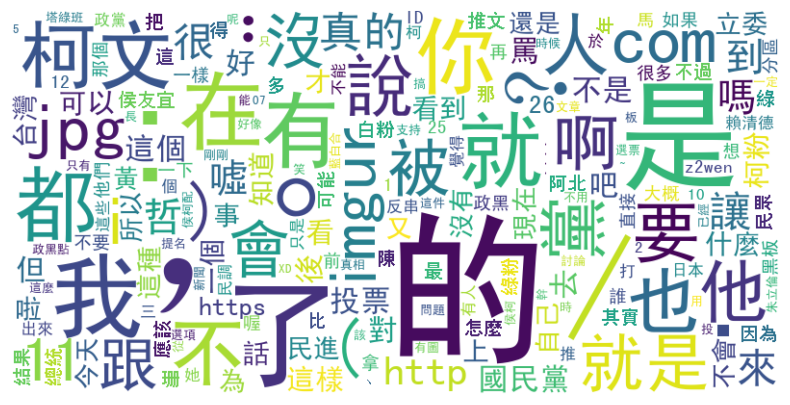

In [14]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 讀取數據
file_path = 'message_0108.csv'  # 更新為您的檔案路徑
data = pd.read_csv(file_path)

# 指定感興趣的作者名字
specific_author = 'TheoEpstein (Red Sox→Cubs→？)'  # 更新為您的作者名稱

# 篩選出該作者的發文內容，去除重複內容
author_content = data[data['author'] == specific_author]['content'].unique()

# 使用 jieba 進行中文分詞
words = jieba.cut(" ".join(author_content))

# 計算詞頻
word_counts = Counter(words)

# 使用詞頻生成文字雲
wordcloud = WordCloud(font_path='/Library/Fonts/SimHei.ttf', width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# 顯示文字雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [15]:
# 對詞頻進行從大到小的排序並顯示
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
for word, count in sorted_word_counts:
    print(f"詞語 '{word}' 的詞頻: {count}")

詞語 ' ' 的詞頻: 8992
詞語 '，' 的詞頻: 3023
詞語 '。' 的詞頻: 2188
詞語 '的' 的詞頻: 2055
詞語 ':' 的詞頻: 1686
詞語 '/' 的詞頻: 1310
詞語 '.' 的詞頻: 1123
詞語 '了' 的詞頻: 1020
詞語 '是' 的詞頻: 1014
詞語 '我' 的詞頻: 577
詞語 '？' 的詞頻: 557
詞語 '在' 的詞頻: 482
詞語 '就' 的詞頻: 474
詞語 '有' 的詞頻: 452
詞語 '你' 的詞頻: 448
詞語 '都' 的詞頻: 437
詞語 '不' 的詞頻: 366
詞語 '柯文' 的詞頻: 362
詞語 '也' 的詞頻: 323
詞語 '(' 的詞頻: 303
詞語 ')' 的詞頻: 301
詞語 '：' 的詞頻: 299
詞語 '他' 的詞頻: 296
詞語 '黨' 的詞頻: 293
詞語 '人' 的詞頻: 289
詞語 '說' 的詞頻: 287
詞語 'com' 的詞頻: 283
詞語 'jpg' 的詞頻: 274
詞語 'imgur' 的詞頻: 272
詞語 'i' 的詞頻: 269
詞語 '要' 的詞頻: 265
詞語 '啊' 的詞頻: 259
詞語 '就是' 的詞頻: 250
詞語 '被' 的詞頻: 235
詞語 '會' 的詞頻: 225
詞語 '沒' 的詞頻: 225
詞語 '跟' 的詞頻: 218
詞語 '11' 的詞頻: 217
詞語 '真的' 的詞頻: 213
詞語 '讓' 的詞頻: 211
詞語 'http' 的詞頻: 198
詞語 '很' 的詞頻: 197
詞語 '來' 的詞頻: 195
詞語 '噓' 的詞頻: 181
詞語 '到' 的詞頻: 179
詞語 '嗎' 的詞頻: 177
詞語 '哲' 的詞頻: 176
詞語 '國民黨' 的詞頻: 171
詞語 '吧' 的詞頻: 166
詞語 '去' 的詞頻: 166
詞語 '罵' 的詞頻: 164
詞語 '不是' 的詞頻: 159
詞語 '後' 的詞頻: 157
詞語 '投票' 的詞頻: 155
詞語 '但' 的詞頻: 155
詞語 '好' 的詞頻: 153
詞語 '這個' 的詞頻: 151
詞語 '對' 的詞頻: 146
詞語 '可以' 的詞頻: 140
詞語 '柯粉' 的詞頻: 139
詞語 '看' 的詞

以人名來看的話，「詞語 '柯文' 的詞頻: 362」出現最多，他可能很關注柯文哲

情緒詞的話，詞語 '噓' 的詞頻: 181 ，詞語 '罵' 的詞頻: 164，詞語 '好' 的詞頻: 153，以負面詞出現較多，這個人可能比較不喜歡柯文哲

# 以發文次數最多的人出發：zeuswell (幫我想個有梗的暱稱)	

# 查看zeuswell (幫我想個有梗的暱稱)	都跟誰互動

In [18]:
import pandas as pd
import networkx as nx

# 讀取數據
file_path = 'message_0108.csv'  
data = pd.read_csv(file_path)

# 指定感興趣的節點
specific_node = 'zeuswell (幫我想個有梗的暱稱)'  # 請替換為實際節點名稱

# 創建一個網絡圖對象
G = nx.Graph()

# 根據互動添加邊，並計數每對節點間的互動次數
interaction_counts = {}
for index, row in data.iterrows():
    edge = (row['author'], row['push_userid'])
    if edge in interaction_counts:
        interaction_counts[edge] += 1
    else:
        interaction_counts[edge] = 1

# 設定互動次數的閾值
interaction_threshold = 300

# 創建一個列表來存儲特定節點的互動次數超過閾值的節點對及其互動次數
filtered_interactions = []

# 遍歷互動計數，只考慮涉及特定節點且互動次數超過閾值的邊
for edge, count in interaction_counts.items():
    if specific_node in edge and count > interaction_threshold:
        filtered_interactions.append((edge, count))

# 按互動次數從大到小排序
filtered_interactions.sort(key=lambda x: x[1], reverse=True)

# 打印被篩選出來的節點及其互動次數（從大到小）
print(f"與節點 {specific_node} 的互動次數（超過300次，從大到小）:")
for edge, count in filtered_interactions:
    print(f"節點 {edge[0]} 和 {edge[1]} 的互動次數: {count}")


與節點 zeuswell (幫我想個有梗的暱稱) 的互動次數（超過300次，從大到小）:
節點 zeuswell (幫我想個有梗的暱稱) 和 zeuswell 的互動次數: 958


zeuswell (幫我想個有梗的暱稱) 雖然發文數量最多，但是沒什麼人跟他互動

In [19]:
# 設定互動次數的閾值
interaction_threshold = 50

# 創建一個列表來存儲特定節點的互動次數超過閾值的節點對及其互動次數
filtered_interactions = []

# 遍歷互動計數，只考慮涉及特定節點且互動次數超過閾值的邊
for edge, count in interaction_counts.items():
    if specific_node in edge and count > interaction_threshold:
        filtered_interactions.append((edge, count))

# 按互動次數從大到小排序
filtered_interactions.sort(key=lambda x: x[1], reverse=True)

# 打印被篩選出來的節點及其互動次數（從大到小）
print(f"與節點 {specific_node} 的互動次數（超過300次，從大到小）:")
for edge, count in filtered_interactions:
    print(f"節點 {edge[0]} 和 {edge[1]} 的互動次數: {count}")

與節點 zeuswell (幫我想個有梗的暱稱) 的互動次數（超過300次，從大到小）:
節點 zeuswell (幫我想個有梗的暱稱) 和 zeuswell 的互動次數: 958
節點 zeuswell (幫我想個有梗的暱稱) 和 Fallenshit 的互動次數: 184
節點 zeuswell (幫我想個有梗的暱稱) 和 aragorn747 的互動次數: 150
節點 zeuswell (幫我想個有梗的暱稱) 和 TheoEpstein 的互動次數: 139
節點 zeuswell (幫我想個有梗的暱稱) 和 gogen 的互動次數: 132
節點 zeuswell (幫我想個有梗的暱稱) 和 LeeSeDol 的互動次數: 132
節點 zeuswell (幫我想個有梗的暱稱) 和 CHENXOX 的互動次數: 107
節點 zeuswell (幫我想個有梗的暱稱) 和 EDFR 的互動次數: 88
節點 zeuswell (幫我想個有梗的暱稱) 和 Rrrxddd 的互動次數: 85
節點 zeuswell (幫我想個有梗的暱稱) 和 PunkGrass 的互動次數: 80
節點 zeuswell (幫我想個有梗的暱稱) 和 nalthax 的互動次數: 79
節點 zeuswell (幫我想個有梗的暱稱) 和 MVPGGYY 的互動次數: 78
節點 zeuswell (幫我想個有梗的暱稱) 和 WTF55665566 的互動次數: 78
節點 zeuswell (幫我想個有梗的暱稱) 和 tsgd 的互動次數: 76
節點 zeuswell (幫我想個有梗的暱稱) 和 tim1112 的互動次數: 73
節點 zeuswell (幫我想個有梗的暱稱) 和 holyhelm 的互動次數: 69
節點 zeuswell (幫我想個有梗的暱稱) 和 stocktonty 的互動次數: 62
節點 zeuswell (幫我想個有梗的暱稱) 和 Leeheaven 的互動次數: 60
節點 zeuswell (幫我想個有梗的暱稱) 和 DustToDust 的互動次數: 57
節點 zeuswell (幫我想個有梗的暱稱) 和 tinmar 的互動次數: 55
節點 zeuswell (幫我想個有梗的暱稱) 和 hydra3179 的互動次數: 54
節點 z

# 查看zeuswell (幫我想個有梗的暱稱)都發什麼文

In [20]:
import pandas as pd

# 讀取數據
file_path = 'message_0108.csv'  
data = pd.read_csv(file_path)

# 指定感興趣的作者名字
specific_author = 'zeuswell (幫我想個有梗的暱稱)'  # 請替換為實際作者名稱

# 篩選出該作者的發文內容，去除重複內容
author_content = data[data['author'] == specific_author]['content'].unique()

count = 0
# 顯示該作者的發文內容
for content in author_content:
    count +=1
    print(content)
    print("----")


當事人: cplusplus426 判決依據 2.發表文章須40個繁體中文字以上，外文以單詞計算。作者本人轉錄文章以 轉錄文章字數計數。 (簽名檔、網址、無意義字詞、轉錄他人文章、他方平台及轉錄/發表新聞內容不計入) 禁止手動置底相似文章或發/推文過多簡體字，以上違者刪除。 證據檢附 文章代碼(AID): 1bBcdavz (HatePolitics) [ptt.cc] [黑特] 公務員484真的很? 文章網址: https://www.ptt.cc/bbs/HatePolitics/M.1697540580.A.E7D.html 這一篇文章值 2 Ptt幣 這三小包？ 怎麼相關人員不全開除 審理說明 本案經由巡查，依照板規水桶 附註 判決結果: 水桶 7 天 
----
塔綠班主人去幫甲魚站台 跑出一個不知道哪來的在那邊叫 說自己才有資格吃這盤飼料 但塔綠班主人根本沒理過你ㄚ 選的這ㄇ醜這ㄇ可憐何必ㄌㄧㄝ https://i.imgur.com/6cmEpUT.jpg
----
如題 我重感冒4天 你們塔綠班也洗了4天廢文 今天上來看一下 怎ㄇ還在洗阿北跟齁齁 我這幾天偶爾也有看到綠粉討厭心die 也有一些支持的 我就問 綠色甲魚跟綠色心die粉 你悶都不會發文吵架的嗎 
----
出張嘴就幫黨敗票ㄉ那種 然後又愛蹭來蹭去 覺得自己很屌很厲害 其實沒了冥進洞 這ㄍ廢物小黨是一點屁用都沒有 
----
當事人: Reichenau 判決依據 2.發表文章須40個繁體中文字以上，外文以單詞計算。作者本人轉錄文章以 轉錄文章字數計數。 (簽名檔、網址、無意義字詞、轉錄他人文章、他方平台及轉錄/發表新聞內容不計入) 禁止手動置底相似文章或發/推文過多簡體字，以上違者刪除。 證據檢附 忘記複製連結 內文: 如題 如果兩個只能有一個要落選 大家要看哪一個落選 為什麼 大餅公看麥 審理說明 本案經由巡查，依照板規水桶 附註 6/03 zeuswell [公告] Reichenau 22 開封有個包青天 8/10 zeuswell [公告] Reichenau 22 7天 判決結果: 水桶 21 天 
----
1.轉錄網址 https://reurl.cc/Ryknq6 2.轉錄來源 何典 3.轉錄內容 我的感覺是，基進黨偽稱他們因為賴清德支高嘉瑜才主張總統不投賴；但我想他們不

In [21]:
print(f"發文數量：{count}")

發文數量：571


跟前面統計的值，有點落差，暫時沒有找問題，但是發文數還是很多

# 進行文字分析，使用jieba跟文字雲

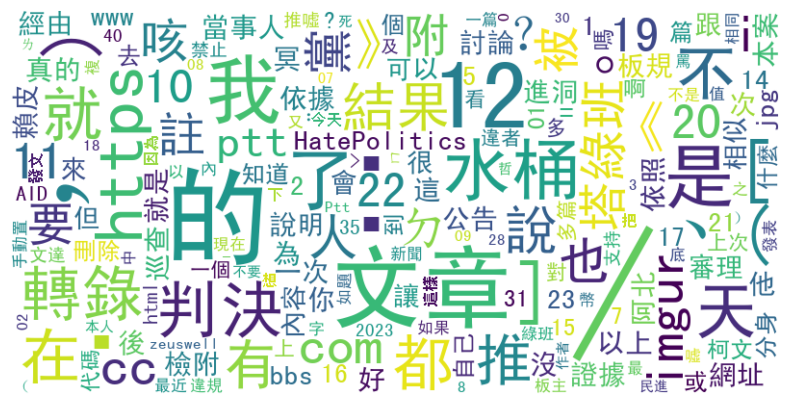

In [22]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 讀取數據
file_path = 'message_0108.csv'  # 更新為您的檔案路徑
data = pd.read_csv(file_path)

# 指定感興趣的作者名字
specific_author = 'zeuswell (幫我想個有梗的暱稱)'  # 更新為您的作者名稱

# 篩選出該作者的發文內容，去除重複內容
author_content = data[data['author'] == specific_author]['content'].unique()

# 使用 jieba 進行中文分詞
words = jieba.cut(" ".join(author_content))

# 計算詞頻
word_counts = Counter(words)

# 使用詞頻生成文字雲
wordcloud = WordCloud(font_path='/Library/Fonts/SimHei.ttf', width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# 顯示文字雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [23]:
# 對詞頻進行從大到小的排序並顯示
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
for word, count in sorted_word_counts:
    print(f"詞語 '{word}' 的詞頻: {count}")

詞語 ' ' 的詞頻: 18637
詞語 '/' 的詞頻: 4180
詞語 ':' 的詞頻: 3703
詞語 '.' 的詞頻: 3400
詞語 '，' 的詞頻: 1822
詞語 '的' 的詞頻: 1446
詞語 '12' 的詞頻: 1064
詞語 '文章' 的詞頻: 965
詞語 '、' 的詞頻: 763
詞語 '我' 的詞頻: 716
詞語 '。' 的詞頻: 706
詞語 ']' 的詞頻: 624
詞語 '[' 的詞頻: 622
詞語 ')' 的詞頻: 620
詞語 '(' 的詞頻: 619
詞語 '是' 的詞頻: 600
詞語 '了' 的詞頻: 583
詞語 'https' 的詞頻: 572
詞語 '水桶' 的詞頻: 556
詞語 '判決' 的詞頻: 456
詞語 '天' 的詞頻: 456
詞語 '《' 的詞頻: 430
詞語 '》' 的詞頻: 430
詞語 '不' 的詞頻: 426
詞語 '都' 的詞頻: 420
詞語 '轉錄' 的詞頻: 416
詞語 '在' 的詞頻: 416
詞語 '就' 的詞頻: 416
詞語 '推' 的詞頻: 364
詞語 'cc' 的詞頻: 357
詞語 '結果' 的詞頻: 337
詞語 'imgur' 的詞頻: 337
詞語 'com' 的詞頻: 337
詞語 '有' 的詞頻: 334
詞語 '說' 的詞頻: 322
詞語 'i' 的詞頻: 309
詞語 '11' 的詞頻: 309
詞語 '？' 的詞頻: 303
詞語 '也' 的詞頻: 289
詞語 '黨' 的詞頻: 286
詞語 '塔綠班' 的詞頻: 281
詞語 '人' 的詞頻: 278
詞語 '20' 的詞頻: 270
詞語 '19' 的詞頻: 266
詞語 '22' 的詞頻: 265
詞語 '咳' 的詞頻: 265
詞語 '註' 的詞頻: 255
詞語 'ㄉ' 的詞頻: 254
詞語 '10' 的詞頻: 253
詞語 '附' 的詞頻: 246
詞語 '被' 的詞頻: 244
詞語 'ptt' 的詞頻: 239
詞語 '要' 的詞頻: 239
詞語 'HatePolitics' 的詞頻: 236
詞語 '2' 的詞頻: 230
詞語 '討論' 的詞頻: 230
詞語 '你' 的詞頻: 223
詞語 '當事人' 的詞頻: 220
詞語 '證據' 的詞頻: 218
詞語 '網址'

「詞語 '塔綠班' 的詞頻: 281」出現頻率很高
 塔綠班意思：戲稱民進黨與其網軍為「塔綠班」，揶揄他們隨時準備對意見不合的人出征。

看起來 zeuswell (幫我想個有梗的暱稱) 很不喜歡民進黨

# 以互動性高、發文次數多的角度出發

jacklyl (全力殲滅糞兔兔卡娜赫拉) 這個人兩者都在前三名

# 查看jacklyl (全力殲滅糞兔兔卡娜赫拉)都跟誰互動

In [26]:
import pandas as pd
import networkx as nx

# 讀取數據
file_path = 'message_0108.csv'  
data = pd.read_csv(file_path)

# 指定感興趣的節點
specific_node = 'jacklyl (全力殲滅糞兔兔卡娜赫拉)'  # 請替換為實際節點名稱

# 創建一個網絡圖對象
G = nx.Graph()

# 根據互動添加邊，並計數每對節點間的互動次數
interaction_counts = {}
for index, row in data.iterrows():
    edge = (row['author'], row['push_userid'])
    if edge in interaction_counts:
        interaction_counts[edge] += 1
    else:
        interaction_counts[edge] = 1

# 設定互動次數的閾值
interaction_threshold = 300

# 創建一個列表來存儲特定節點的互動次數超過閾值的節點對及其互動次數
filtered_interactions = []

# 遍歷互動計數，只考慮涉及特定節點且互動次數超過閾值的邊
for edge, count in interaction_counts.items():
    if specific_node in edge and count > interaction_threshold:
        filtered_interactions.append((edge, count))

# 按互動次數從大到小排序
filtered_interactions.sort(key=lambda x: x[1], reverse=True)

# 打印被篩選出來的節點及其互動次數（從大到小）
print(f"與節點 {specific_node} 的互動次數（超過300次，從大到小）:")
for edge, count in filtered_interactions:
    print(f"節點 {edge[0]} 和 {edge[1]} 的互動次數: {count}")


與節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 的互動次數（超過300次，從大到小）:
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 jacklyl 的互動次數: 496


In [28]:
# 設定互動次數的閾值
interaction_threshold = 50

# 創建一個列表來存儲特定節點的互動次數超過閾值的節點對及其互動次數
filtered_interactions = []

# 遍歷互動計數，只考慮涉及特定節點且互動次數超過閾值的邊
for edge, count in interaction_counts.items():
    if specific_node in edge and count > interaction_threshold:
        filtered_interactions.append((edge, count))

# 按互動次數從大到小排序
filtered_interactions.sort(key=lambda x: x[1], reverse=True)

# 打印被篩選出來的節點及其互動次數（從大到小）
print(f"與節點 {specific_node} 的互動次數（超過50次，從大到小）:")
for edge, count in filtered_interactions:
    print(f"節點 {edge[0]} 和 {edge[1]} 的互動次數: {count}")

與節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 的互動次數（超過50次，從大到小）:
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 jacklyl 的互動次數: 496
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 tim1112 的互動次數: 181
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 lasekoutkast 的互動次數: 173
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 zeuswell 的互動次數: 168
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 tinmar 的互動次數: 167
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 PunkGrass 的互動次數: 160
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 amare1015 的互動次數: 159
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 LeeSeDol 的互動次數: 133
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 gogen 的互動次數: 127
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 Adler87 的互動次數: 127
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 Fallenshit 的互動次數: 125
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 win8719 的互動次數: 123
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 chu 的互動次數: 118
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 tsgd 的互動次數: 108
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 kterry01 的互動次數: 95
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 Falagar 的互動次數: 95
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 iamdota 的互動次數: 89
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 s81048112 的互動次數: 87
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 rancilio 的互動次數: 86
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 DustToDust 的互動次數: 81
節點 jacklyl (全力殲滅糞兔兔卡娜赫拉) 和 whi

# 查看jacklyl (全力殲滅糞兔兔卡娜赫拉)都發什麼文

In [30]:
import pandas as pd

# 讀取數據
file_path = 'message_0108.csv'  
data = pd.read_csv(file_path)

# 指定感興趣的作者名字
specific_author = 'jacklyl (全力殲滅糞兔兔卡娜赫拉)'  # 請替換為實際作者名稱

# 篩選出該作者的發文內容，去除重複內容
author_content = data[data['author'] == specific_author]['content'].unique()

count = 0
# 顯示該作者的發文內容
for content in author_content:
    count +=1
    print(content)
    print("----")


我柯粉 因為民進黨實在太靠北 從論文BNT進口蛋每次都在硬凹 加上6000個位置酬庸8年，已經夠爽了 大家一樣爛，沒道理讓民進黨當幸運兒 所以第一優先就是民進黨下台 在野聯盟當選，在野聯盟國會過半 但是 如果明顯沒辦法政黨輪替了 例如柯正國副，或棄侯保柯氣氛沒出來 那只好第二順位 就是執政黨連任國會完全執政 這沒辦法 因為講到朝小野大 我相信經歷過陳水扁那段的人全部都不寒而慄 朝小野大真的是比民進黨連任還慘的結果 國會整天吵架杯葛，政府失能什麼事都做不了 阿扁執政觀感差至少有8成是朝小野大害的 什麼事都做不了 當然只能變成嘴砲吵架，然後就黑掉了 所以我柯粉 無法政黨輪替就只好支持完全執政 再觀望看看 如果沒辦法拉下來 也只能這樣了 唉qq 
----
民進黨員談藍白合 柯辦主任周榆修宣布退黨 告別20年歲月 壹蘋 https://reurl.cc/GKnMZp 民眾黨總統參選人柯文哲競選辦公室主任周榆修14日和柯文哲競選總幹事黃珊珊代表民眾黨 出席藍白合會前會，周榆修卻被發現目前還具備民進黨員身分，引發綠營不滿，民進黨 評委會將討論除名，周榆修也在今天發出聲明，指出剛剛已向民進黨北市黨部遞出退黨聲明 書，強調選擇留在柯團隊，告別20年歲月，我會在清廉、勤政、愛鄉土的道路上持續昂首 前進。 國民黨、民眾黨上週舉行22會談，其中民眾黨派出柯文哲競選總幹事黃珊珊、柯辦主任 周榆修。不過周有民進黨籍，卻頻繁上節目喊下架民進黨、政黨輪替等語，民進黨台北市黨 部主委張茂楠也透露將開會除名。民進黨中評會主委賴瑞隆表示，周榆修是一般黨員，權限 上地方黨部也能處理，因此沒有送到中評會來；民進黨發言人張志豪表示，尊重所屬台北市 黨部的處理，若黨員違反黨章黨綱及本黨相關規定，將開除黨籍。 周榆修今天親上火線回應，表示自己剛剛正式向民進黨台北市黨部第出退黨聲明書，也跟張 茂楠主委確認收到聲明書。他從2017年5月加入柯市府，從幕僚到政務官到現在的總統候選人 辦公室，我早上想想，前後大概將近六年半的時間，我跟柯文哲一起走過每天七點半的晨 會，也走過以政績突圍的2018年市長連任選舉。 周榆修說，一路走來讓他覺得最特別、也影響他最多的就是整個團隊的清廉、勤政、奉公及 認真的文化，這也是讓自己選擇留在柯文哲團隊最大的原因；同時也要感謝過去的老戰友跟 長官，我離開民進黨，沒有離開台灣。爾後這麼長的

# 進行文字分析，使用jieba跟文字雲

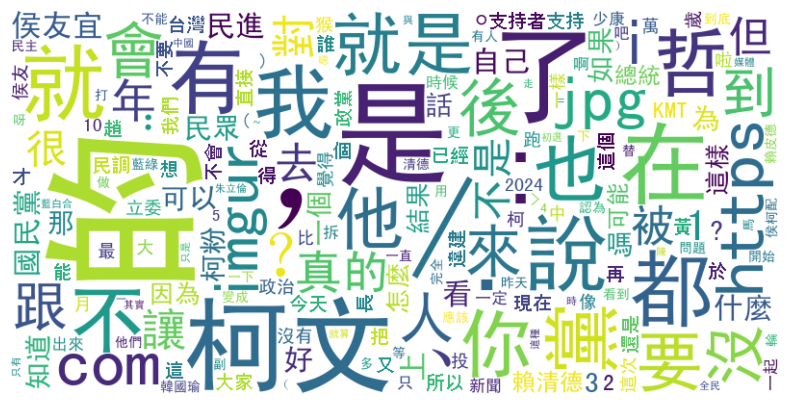

In [29]:
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 讀取數據
file_path = 'message_0108.csv'  # 更新為您的檔案路徑
data = pd.read_csv(file_path)

# 指定感興趣的作者名字
specific_author = 'jacklyl (全力殲滅糞兔兔卡娜赫拉)'  # 更新為您的作者名稱

# 篩選出該作者的發文內容，去除重複內容
author_content = data[data['author'] == specific_author]['content'].unique()

# 使用 jieba 進行中文分詞
words = jieba.cut(" ".join(author_content))

# 計算詞頻
word_counts = Counter(words)

# 使用詞頻生成文字雲
wordcloud = WordCloud(font_path='/Library/Fonts/SimHei.ttf', width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

# 顯示文字雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [31]:
# 對詞頻進行從大到小的排序並顯示
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
for word, count in sorted_word_counts:
    print(f"詞語 '{word}' 的詞頻: {count}")

詞語 ' ' 的詞頻: 11390
詞語 '的' 的詞頻: 2544
詞語 '，' 的詞頻: 1837
詞語 '/' 的詞頻: 1376
詞語 '.' 的詞頻: 1186
詞語 '是' 的詞頻: 1059
詞語 ':' 的詞頻: 978
詞語 '了' 的詞頻: 952
詞語 '柯文' 的詞頻: 871
詞語 '在' 的詞頻: 639
詞語 '就' 的詞頻: 576
詞語 '說' 的詞頻: 564
詞語 '都' 的詞頻: 557
詞語 '我' 的詞頻: 556
詞語 '有' 的詞頻: 516
詞語 '黨' 的詞頻: 489
詞語 '不' 的詞頻: 455
詞語 '、' 的詞頻: 447
詞語 '哲' 的詞頻: 447
詞語 '你' 的詞頻: 441
詞語 '也' 的詞頻: 435
詞語 '他' 的詞頻: 403
詞語 '就是' 的詞頻: 398
詞語 'https' 的詞頻: 394
詞語 'com' 的詞頻: 364
詞語 '？' 的詞頻: 355
詞語 '要' 的詞頻: 348
詞語 'imgur' 的詞頻: 338
詞語 'i' 的詞頻: 335
詞語 'jpg' 的詞頻: 333
詞語 '後' 的詞頻: 324
詞語 '沒' 的詞頻: 307
詞語 '會' 的詞頻: 302
詞語 '來' 的詞頻: 286
詞語 '到' 的詞頻: 261
詞語 '跟' 的詞頻: 257
詞語 '人' 的詞頻: 254
詞語 '真的' 的詞頻: 248
詞語 '年' 的詞頻: 246
詞語 '。' 的詞頻: 239
詞語 '讓' 的詞頻: 238
詞語 '對' 的詞頻: 237
詞語 '但' 的詞頻: 232
詞語 '1' 的詞頻: 222
詞語 '被' 的詞頻: 221
詞語 '去' 的詞頻: 214
詞語 '不是' 的詞頻: 205
詞語 '很' 的詞頻: 204
詞語 '：' 的詞頻: 202
詞語 '侯友宜' 的詞頻: 200
詞語 '什麼' 的詞頻: 193
詞語 '國民黨' 的詞頻: 188
詞語 '好' 的詞頻: 187
詞語 '上' 的詞頻: 181
詞語 '自己' 的詞頻: 179
詞語 '看' 的詞頻: 177
詞語 '民進' 的詞頻: 176
詞語 '可以' 的詞頻: 169
詞語 '3' 的詞頻: 164
詞語 '民眾' 的詞頻: 163
詞語 '如果' 